# PREPARAÇÃO DE DADOS ⚒

1. EXTRAÇÃO DOS DADOS TRATADOS

In [21]:
# Importando a biblioteca pandas para manipulação de dados
import pandas as pd

# --- ETAPA 1: CARREGANDO OS DADOS TRATADOS ---

nome_do_arquivo = "churn_dados_tratados.csv"

# Tenta carregar o arquivo CSV para um novo DataFrame chamado 'df_modelo'
try:
    df_modelo = pd.read_csv(nome_do_arquivo)

    # --- VERIFICAÇÃO INICIAL ---
    #garantir que tudo foi carregado corretamente.

    print(f"Arquivo '{nome_do_arquivo}' carregado com sucesso!")

    print("\nVisualização das 5 primeiras linhas do DataFrame:")
    # A função display() formata a tabela de forma mais legível no notebook
    display(df_modelo.head())

    print("\n\nInformações gerais e tipos de dados do DataFrame:")
    df_modelo.info()

except FileNotFoundError:
    print(f"ERRO: O arquivo '{nome_do_arquivo}' não foi encontrado.")
    print("Por favor, certifique-se de que você fez o upload do arquivo para o ambiente do Colab.")

Arquivo 'churn_dados_tratados.csv' carregado com sucesso!

Visualização das 5 primeiras linhas do DataFrame:


,ID_Cliente,Churn,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Tempo_de_Contrato_Meses,Servico_Telefonico,Multiplas_Linhas,Servico_de_Internet,...,Protecao_de_Dispositivo,Suporte_Tecnico,Streaming_de_TV,Streaming_de_Filmes,Tipo_de_Contrato,Fatura_Online,Metodo_de_Pagamento,Gasto_Mensal,Gasto_Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667




Informações gerais e tipos de dados do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               7043 non-null   object 
 1   Churn                    7043 non-null   int64  
 2   Genero                   7043 non-null   object 
 3   Idoso                    7043 non-null   int64  
 4   Possui_Parceiro          7043 non-null   int64  
 5   Possui_Dependentes       7043 non-null   int64  
 6   Tempo_de_Contrato_Meses  7043 non-null   int64  
 7   Servico_Telefonico       7043 non-null   int64  
 8   Multiplas_Linhas         7043 non-null   int64  
 9   Servico_de_Internet      7043 non-null   object 
 10  Seguranca_Online         7043 non-null   int64  
 11  Backup_Online            7043 non-null   int64  
 12  Protecao_de_Dispositivo  7043 non-null   int64  
 13  Suporte_Tecnico          7

2. Remoção de Colunas Irrelevantes

In [22]:
# --- ETAPA 2: REMOÇÃO DE COLUNAS IRRELEVANTES ---

# O 'try...except' garante que o código não dará erro se a célula for executada mais de uma vez.
try:
    # A coluna 'ID_Cliente' é um identificador único e não ajuda o modelo a prever o churn.
    # Vamos removê-la para a fase de modelagem.
    df_modelo = df_modelo.drop(columns=['ID_Cliente'])

    print("--- DataFrame após remover a coluna 'ID_Cliente' ---")
    print("Coluna 'ID_Cliente' removida com sucesso.")

    print("\nVisualização das 5 primeiras linhas do DataFrame atualizado:")
    display(df_modelo.head())

except KeyError:
    print("Aviso: A coluna 'ID_Cliente' já foi removida anteriormente.")
except NameError:
    print("ERRO: O DataFrame 'df_modelo' não foi encontrado. Por favor, execute a célula anterior (Etapa 1) primeiro.")

--- DataFrame após remover a coluna 'ID_Cliente' ---
Coluna 'ID_Cliente' removida com sucesso.

Visualização das 5 primeiras linhas do DataFrame atualizado:


,Churn,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Tempo_de_Contrato_Meses,Servico_Telefonico,Multiplas_Linhas,Servico_de_Internet,Seguranca_Online,...,Protecao_de_Dispositivo,Suporte_Tecnico,Streaming_de_TV,Streaming_de_Filmes,Tipo_de_Contrato,Fatura_Online,Metodo_de_Pagamento,Gasto_Mensal,Gasto_Total,Contas_Diarias
0,0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


3. Encoding

In [23]:
# --- ETAPA 3: ENCODING DE VARIÁVEIS CATEGÓRICAS ---

# O try...except garante que o código não dará erro se a célula for executada mais de uma vez
# ou se o DataFrame não existir.
try:
    # Identificamos as colunas que ainda são do tipo 'object' (texto) e precisam ser convertidas.
    colunas_para_codificar = df_modelo.select_dtypes(include=['object']).columns

    print(f"Colunas a serem codificadas: {list(colunas_para_codificar)}")

    # Utilizamos a função 'get_dummies' do Pandas para aplicar o one-hot encoding.
    # 'drop_first=True' remove a primeira categoria de cada variável para evitar multicolinearidade,
    # uma boa prática em modelagem.
    df_modelo = pd.get_dummies(df_modelo, columns=colunas_para_codificar, drop_first=True)

    print("\n--- DataFrame após o Encoding ---")
    print("Variáveis categóricas convertidas para formato numérico.")

    print("\nVisualização das 5 primeiras linhas do DataFrame transformado:")
    display(df_modelo.head())

    print("\nNovas informações do DataFrame:")
    df_modelo.info()

except NameError:
    print("ERRO: O DataFrame 'df_modelo' não foi encontrado. Por favor, execute as células anteriores primeiro.")

Colunas a serem codificadas: ['Genero', 'Servico_de_Internet', 'Tipo_de_Contrato', 'Metodo_de_Pagamento']

--- DataFrame após o Encoding ---
Variáveis categóricas convertidas para formato numérico.

Visualização das 5 primeiras linhas do DataFrame transformado:


,Churn,Idoso,Possui_Parceiro,Possui_Dependentes,Tempo_de_Contrato_Meses,Servico_Telefonico,Multiplas_Linhas,Seguranca_Online,Backup_Online,Protecao_de_Dispositivo,...,Gasto_Total,Contas_Diarias,Genero_Male,Servico_de_Internet_Fiber optic,Servico_de_Internet_No,Tipo_de_Contrato_One year,Tipo_de_Contrato_Two year,Metodo_de_Pagamento_Credit card (automatic),Metodo_de_Pagamento_Electronic check,Metodo_de_Pagamento_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,593.30,2.186667,False,False,False,True,False,False,False,True
1,0,0,0,0,9,1,1,0,0,0,...,542.40,1.996667,True,False,False,False,False,False,False,True
2,1,0,0,0,4,1,0,0,0,1,...,280.85,2.463333,True,True,False,False,False,False,True,False
3,1,1,1,0,13,1,0,0,1,1,...,1237.85,3.266667,True,True,False,False,False,False,True,False
4,1,1,1,0,3,1,0,0,0,0,...,267.40,2.796667,False,True,False,False,False,False,False,True



Novas informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Churn                                        7043 non-null   int64  
 1   Idoso                                        7043 non-null   int64  
 2   Possui_Parceiro                              7043 non-null   int64  
 3   Possui_Dependentes                           7043 non-null   int64  
 4   Tempo_de_Contrato_Meses                      7043 non-null   int64  
 5   Servico_Telefonico                           7043 non-null   int64  
 6   Multiplas_Linhas                             7043 non-null   int64  
 7   Seguranca_Online                             7043 non-null   int64  
 8   Backup_Online                                7043 non-null   int64  
 9   Protecao_de_Dispositivo                  

4. Verificação da Proporção de Evasão

In [24]:
# --- ETAPA 4: VERIFICAÇÃO DA PROPORÇÃO DE EVASÃO (CHURN) ---

try:
    # Usamos o método value_counts() para contar as ocorrências de cada classe na coluna 'Churn'.
    # 0 = Não Evadiu, 1 = Evadiu
    contagem_churn = df_modelo['Churn'].value_counts()

    # Para obter a proporção, usamos o parâmetro normalize=True.
    # O resultado é multiplicado por 100 para visualizarmos como porcentagem.
    proporcao_churn = df_modelo['Churn'].value_counts(normalize=True) * 100

    print("--- Análise da Proporção da Variável Alvo (Churn) ---")

    print("\nContagem absoluta de cada classe:")
    print(f"Clientes que Não Evadiram (0): {contagem_churn[0]}")
    print(f"Clientes que Evadiram (1):    {contagem_churn[1]}")

    print("\nProporção de cada classe (%):")
    print(f"Clientes que Não Evadiram (0): {proporcao_churn[0]:.2f}%")
    print(f"Clientes que Evadiram (1):    {proporcao_churn[1]:.2f}%")

    print("\n\n--- Avaliação do Desequilíbrio ---")
    print("O dataset é considerado desbalanceado.")
    print("A classe majoritária ('Não Evadiu') representa aproximadamente 73.5% dos dados, enquanto a classe minoritária ('Evadiu') representa cerca de 26.5%.")
    print("Este desequilíbrio deve ser levado em conta ao treinar e avaliar os modelos, utilizando métricas apropriadas como Precisão, Recall, F1-Score e a área sob a curva ROC, além da acurácia.")

except NameError:
    print("ERRO: O DataFrame 'df_modelo' não foi encontrado. Por favor, execute as células anteriores primeiro.")

--- Análise da Proporção da Variável Alvo (Churn) ---

Contagem absoluta de cada classe:
Clientes que Não Evadiram (0): 5174
Clientes que Evadiram (1):    1869

Proporção de cada classe (%):
Clientes que Não Evadiram (0): 73.46%
Clientes que Evadiram (1):    26.54%


--- Avaliação do Desequilíbrio ---
O dataset é considerado desbalanceado.
A classe majoritária ('Não Evadiu') representa aproximadamente 73.5% dos dados, enquanto a classe minoritária ('Evadiu') representa cerca de 26.5%.
Este desequilíbrio deve ser levado em conta ao treinar e avaliar os modelos, utilizando métricas apropriadas como Precisão, Recall, F1-Score e a área sob a curva ROC, além da acurácia.


BALANCEAMENTO DE CLASSES(OPCIONAL)

In [25]:
# --- ETAPA 4: VERIFICAÇÃO DA PROPORÇÃO E BALANCEAMENTO DE CLASSES ---

try:
    # Usamos o método value_counts() para contar as ocorrências de cada classe na coluna 'Churn'.
    # 0 = Não Evadiu, 1 = Evadiu
    contagem_churn = df_modelo['Churn'].value_counts()

    # Para obter a proporção, usamos o parâmetro normalize=True.
    # O resultado é multiplicado por 100 para visualizarmos como porcentagem.
    proporcao_churn = df_modelo['Churn'].value_counts(normalize=True) * 100

    print("--- Análise da Proporção da Variável Alvo (Churn) ---")

    print("\nContagem absoluta de cada classe:")
    print(f"Clientes que Não Evadiram (0): {contagem_churn[0]}")
    print(f"Clientes que Evadiram (1):    {contagem_churn[1]}")

    print("\nProporção de cada classe (%):")
    print(f"Clientes que Não Evadiram (0): {proporcao_churn[0]:.2f}%")
    print(f"Clientes que Evadiram (1):    {proporcao_churn[1]:.2f}%")

    print("\n\n--- Avaliação do Desequilíbrio ---")
    print("O dataset é considerado desbalanceado.")
    print("A classe majoritária ('Não Evadiu') representa aproximadamente 73.5% dos dados, enquanto a classe minoritária ('Evadiu') representa cerca de 26.5%.")
    print("Este desequilíbrio deve ser levado em conta ao treinar e avaliar os modelos.")

    # --- Balanceamento de Classes com SMOTE (Opcional) ---
    print("\n\n--- Balanceamento de Classes com SMOTE (Opcional) ---")
    print("Aplicando a técnica de oversampling SMOTE para criar um dataset balanceado.")

    # Importando as bibliotecas necessárias
    from imblearn.over_sampling import SMOTE
    from collections import Counter

    # Separando as features (X) e o alvo (y) do nosso dataframe
    X = df_modelo.drop('Churn', axis=1)
    y = df_modelo['Churn']

    # Criando o objeto SMOTE
    # random_state=42 garante que os resultados sejam reprodutíveis
    smote = SMOTE(random_state=42)

    # Aplicando o SMOTE aos dados para gerar novas amostras da classe minoritária
    X_resampled, y_resampled = smote.fit_resample(X, y)

    print("\nDistribuição das classes ANTES do SMOTE:", Counter(y))
    print("Distribuição das classes APÓS o SMOTE:", Counter(y_resampled))
    print("\nO dataset foi balanceado com sucesso. Agora temos um número igual de amostras para cada classe.")
    print("Este novo conjunto de dados (X_resampled, y_resampled) pode ser usado opcionalmente para treinar os modelos.")


except NameError:
    print("ERRO: O DataFrame 'df_modelo' não foi encontrado. Por favor, execute as células anteriores primeiro.")
except ImportError:
    print("\nERRO DE IMPORTAÇÃO: A biblioteca 'imblearn' não foi encontrada.")
    print("Para usar o SMOTE, você precisa instalá-la. Execute o comando abaixo em uma célula:")
    print("!pip install -U imbalanced-learn")

--- Análise da Proporção da Variável Alvo (Churn) ---

Contagem absoluta de cada classe:
Clientes que Não Evadiram (0): 5174
Clientes que Evadiram (1):    1869

Proporção de cada classe (%):
Clientes que Não Evadiram (0): 73.46%
Clientes que Evadiram (1):    26.54%


--- Avaliação do Desequilíbrio ---
O dataset é considerado desbalanceado.
A classe majoritária ('Não Evadiu') representa aproximadamente 73.5% dos dados, enquanto a classe minoritária ('Evadiu') representa cerca de 26.5%.
Este desequilíbrio deve ser levado em conta ao treinar e avaliar os modelos.


--- Balanceamento de Classes com SMOTE (Opcional) ---
Aplicando a técnica de oversampling SMOTE para criar um dataset balanceado.

Distribuição das classes ANTES do SMOTE: Counter({0: 5174, 1: 1869})
Distribuição das classes APÓS o SMOTE: Counter({0: 5174, 1: 5174})

O dataset foi balanceado com sucesso. Agora temos um número igual de amostras para cada classe.
Este novo conjunto de dados (X_resampled, y_resampled) pode ser usa

5. Normalização ou Padronização (se necessário)

In [26]:
# Importando as bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# --- ETAPA 5: DIVISÃO EM TREINO/TESTE E PADRONIZAÇÃO DOS DADOS ---

try:
    # --- 5.1 Divisão em Features (X) e Alvo (y) ---
    # Vamos usar o dataset original (desbalanceado) por padrão.
    # Se você optar por usar os dados balanceados, substitua df_modelo por um DataFrame
    # criado a partir de X_resampled e y_resampled.

    X = df_modelo.drop('Churn', axis=1)
    y = df_modelo['Churn']

    # --- 5.2 Divisão em Conjuntos de Treino e Teste ---
    # 80% dos dados para treino, 20% para teste.
    # random_state=42 garante que a divisão seja sempre a mesma, para reprodutibilidade.
    # stratify=y garante que a proporção de Churn seja a mesma nos conjuntos de treino e teste.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("--- Dados divididos em conjuntos de Treino e Teste ---")
    print(f"Dimensões de X_train: {X_train.shape}")
    print(f"Dimensões de X_test:  {X_test.shape}")


    # --- 5.3 Padronização das Variáveis Numéricas ---
    print("\n--- Aplicando a Padronização (StandardScaler) ---")

    # Identificamos as colunas que possuem uma escala maior e precisam ser padronizadas.
    # As colunas que são 0 ou 1 (flags) não precisam de padronização.
    colunas_para_padronizar = ['Tempo_de_Contrato_Meses', 'Gasto_Mensal', 'Gasto_Total', 'Contas_Diarias']

    # Criamos o objeto normalizador (scaler)
    scaler = StandardScaler()

    # ATENÇÃO: Ajustamos o scaler APENAS com os dados de TREINO.
    # Isso evita que informações do conjunto de teste "vazem" para o treino.
    X_train[colunas_para_padronizar] = scaler.fit_transform(X_train[colunas_para_padronizar])

    # Aplicamos a MESMA transformação (com o scaler já ajustado) nos dados de TESTE.
    X_test[colunas_para_padronizar] = scaler.transform(X_test[colunas_para_padronizar])

    print("Padronização aplicada com sucesso nos conjuntos de treino e teste.")

    print("\nVisualização das 5 primeiras linhas do X_train padronizado:")
    display(X_train.head())

except NameError:
    print("ERRO: O DataFrame 'df_modelo' não foi encontrado. Por favor, execute as células anteriores primeiro.")

--- Dados divididos em conjuntos de Treino e Teste ---
Dimensões de X_train: (5634, 24)
Dimensões de X_test:  (1409, 24)

--- Aplicando a Padronização (StandardScaler) ---
Padronização aplicada com sucesso nos conjuntos de treino e teste.

Visualização das 5 primeiras linhas do X_train padronizado:


,Idoso,Possui_Parceiro,Possui_Dependentes,Tempo_de_Contrato_Meses,Servico_Telefonico,Multiplas_Linhas,Seguranca_Online,Backup_Online,Protecao_de_Dispositivo,Suporte_Tecnico,...,Gasto_Total,Contas_Diarias,Genero_Male,Servico_de_Internet_Fiber optic,Servico_de_Internet_No,Tipo_de_Contrato_One year,Tipo_de_Contrato_Two year,Metodo_de_Pagamento_Credit card (automatic),Metodo_de_Pagamento_Electronic check,Metodo_de_Pagamento_Mailed check
3793,0,1,0,1.124891,1,1,1,1,0,0,...,1.398565,0.968250,False,True,False,False,False,True,False,False
3192,0,0,1,-0.827880,1,0,0,0,0,0,...,-0.913119,-1.521717,True,False,True,False,True,False,False,False
4922,0,0,0,-1.234707,1,0,1,0,1,0,...,-0.946146,0.513560,False,True,False,False,False,False,True,False
3926,0,1,1,0.026457,1,0,1,0,1,0,...,0.071090,0.323690,True,False,False,True,False,True,False,False
3859,0,0,1,-0.746514,1,1,1,0,0,1,...,-0.495126,0.698434,False,True,False,False,False,False,False,True


# 🎯 Correlação e Seleção de Variáveis

1. Análise de Correlação

--- Matriz de Correlação (Heatmap) ---


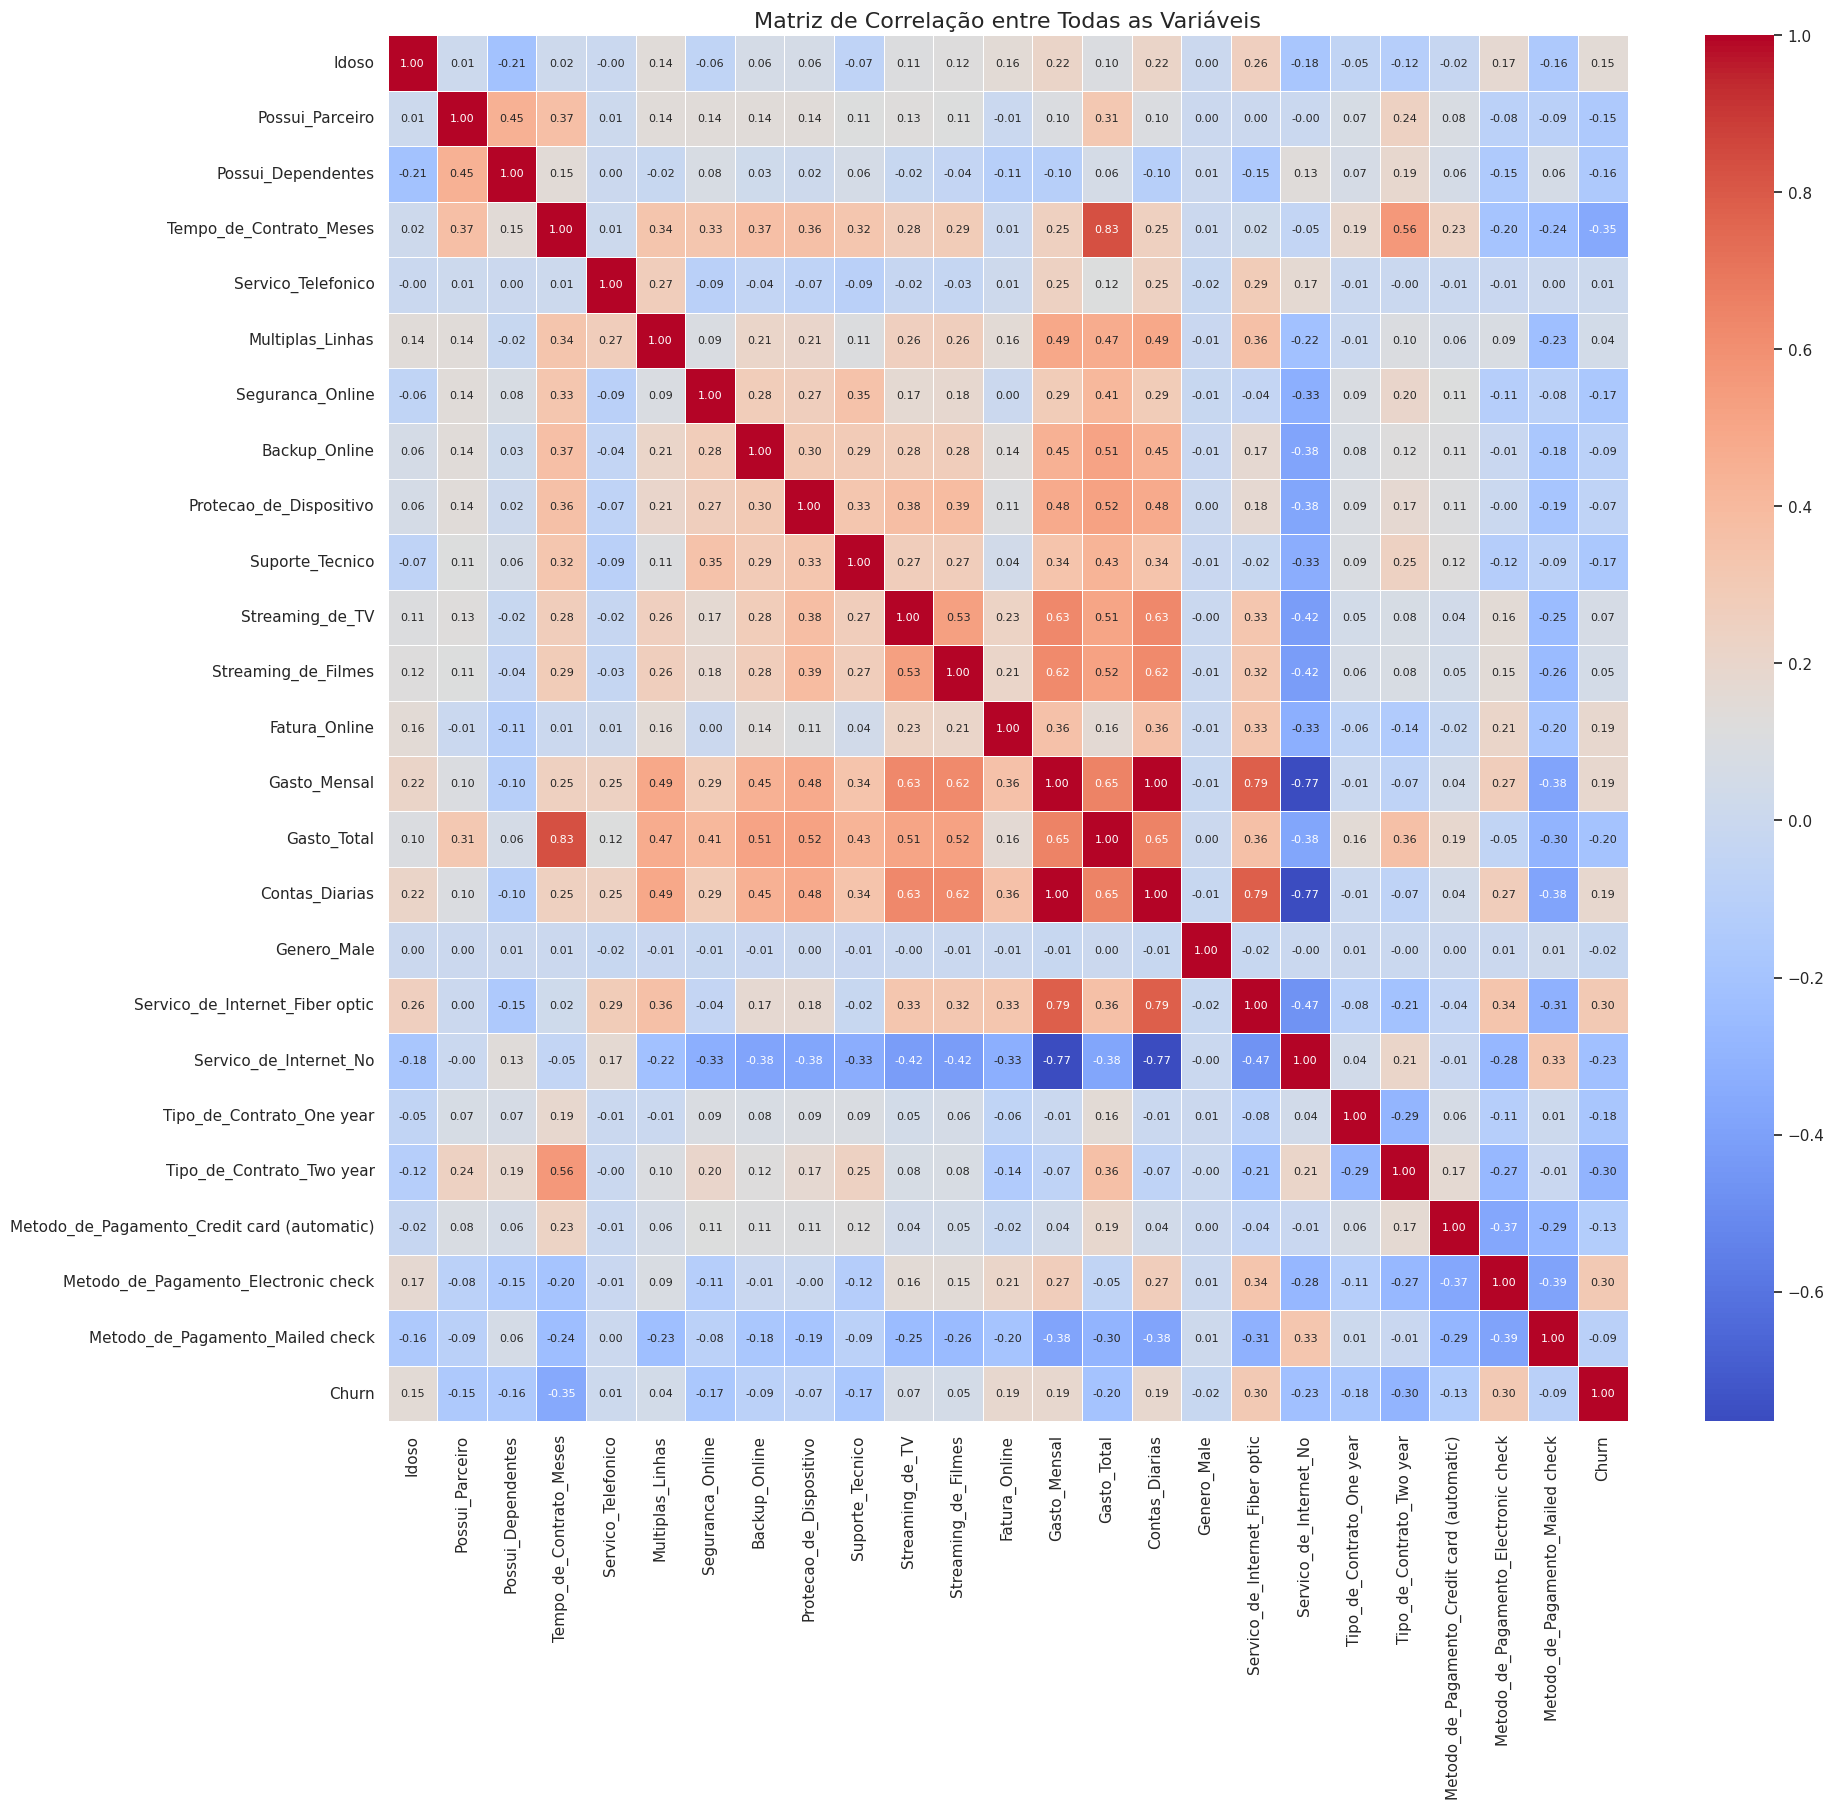


--- Correlação de todas as variáveis com o Churn ---


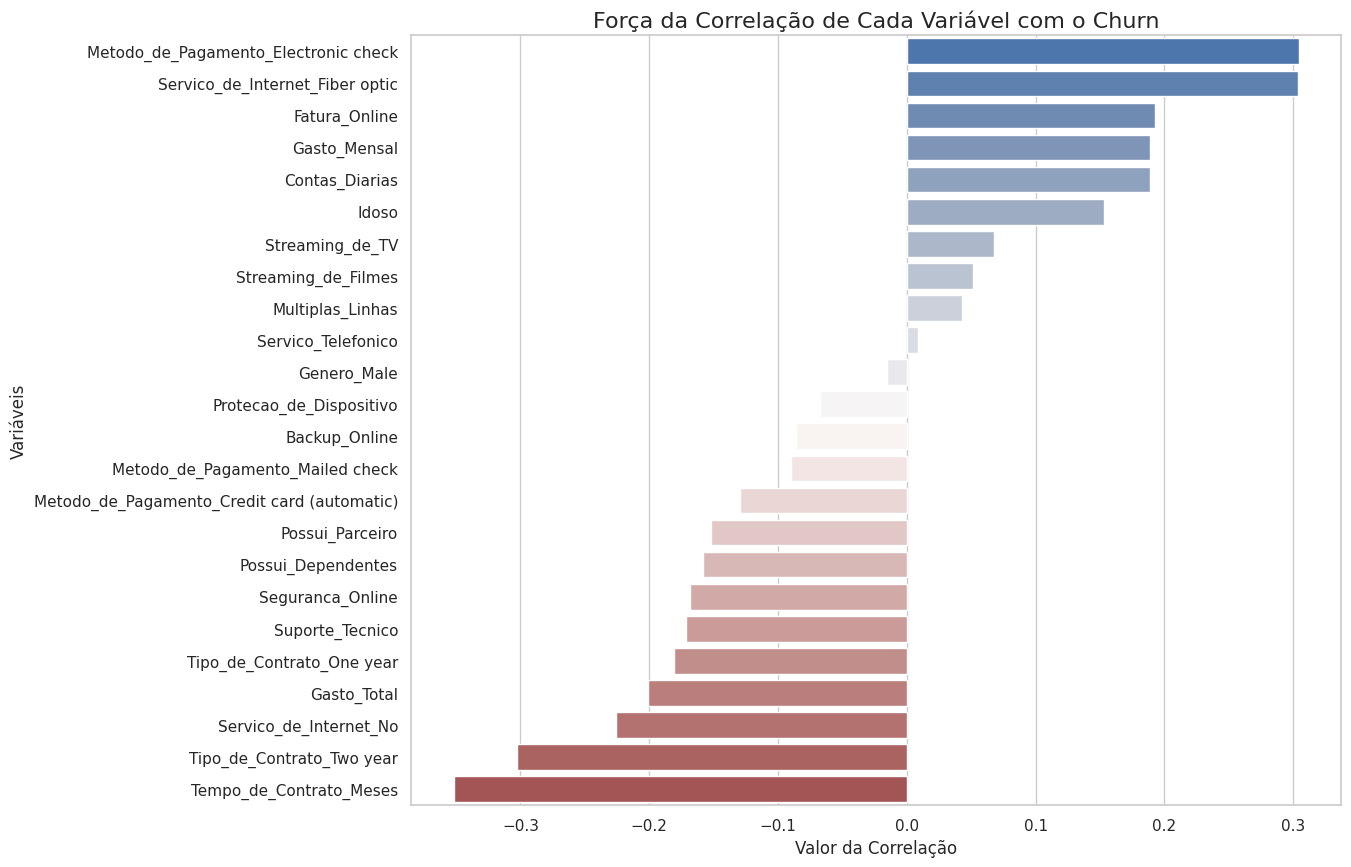

In [27]:
# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- ETAPA 6: ANÁLISE DE CORRELAÇÃO ---

try:
    # Para calcular a correlação, precisamos juntar temporariamente X_train e y_train
    # É uma boa prática calcular a correlação apenas no conjunto de treino
    df_treino_corr = X_train.copy()
    df_treino_corr['Churn'] = y_train

    # --- 6.1 Visualização da Matriz de Correlação Completa (Heatmap) ---
    print("--- Matriz de Correlação (Heatmap) ---")

    # Calcula a matriz de correlação
    matriz_correlacao = df_treino_corr.corr()

    # Cria o mapa de calor (heatmap)
    plt.figure(figsize=(20, 18))
    sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
    plt.title('Matriz de Correlação entre Todas as Variáveis', fontsize=16)
    plt.show()


    # --- 6.2 Foco na Correlação com a variável "Churn" ---
    print("\n--- Correlação de todas as variáveis com o Churn ---")

    # Pegamos a coluna 'Churn' da matriz de correlação, removemos a correlação dela com ela mesma (que é 1)
    # e ordenamos os valores para melhor visualização.
    corr_churn = matriz_correlacao['Churn'].drop('Churn').sort_values(ascending=False)

    plt.figure(figsize=(12, 10))
    # Usamos o hue para evitar o FutureWarning e colorir as barras
    sns.barplot(x=corr_churn.values, y=corr_churn.index, palette='vlag', hue=corr_churn.index, legend=False)
    plt.title('Força da Correlação de Cada Variável com o Churn', fontsize=16)
    plt.xlabel('Valor da Correlação', fontsize=12)
    plt.ylabel('Variáveis', fontsize=12)
    plt.show()


except NameError:
    print("ERRO: Os DataFrames 'X_train' e 'y_train' não foram encontrados.")
    print("Por favor, execute a célula anterior (Etapa 5) primeiro.")

2. Análises Direcionadas

--- Análise Direcionada: Tempo de Contrato vs. Evasão ---


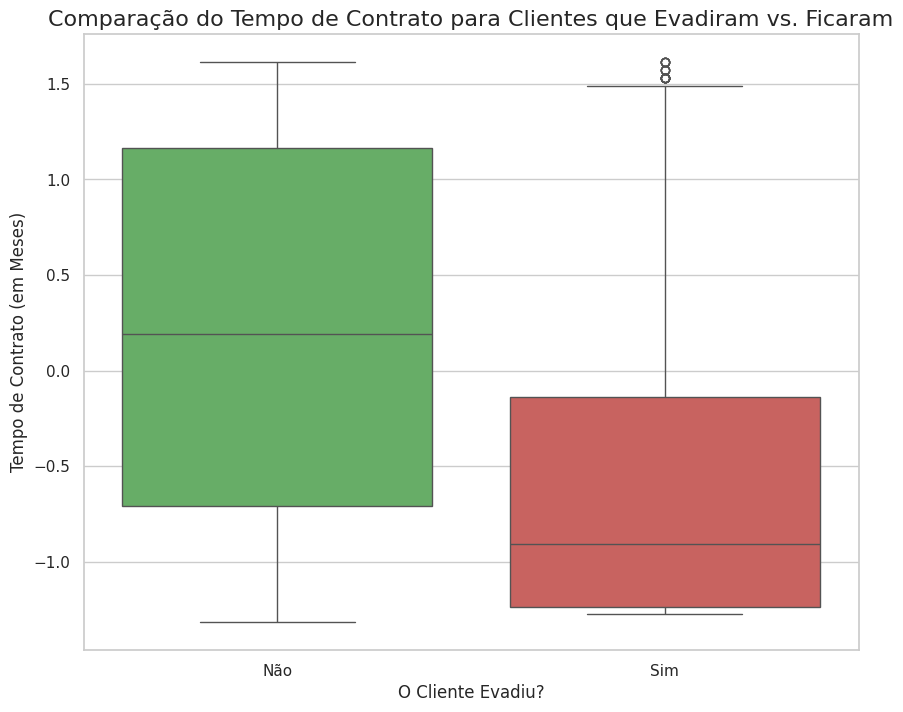


--- Análise Direcionada: Gasto Total vs. Evasão ---


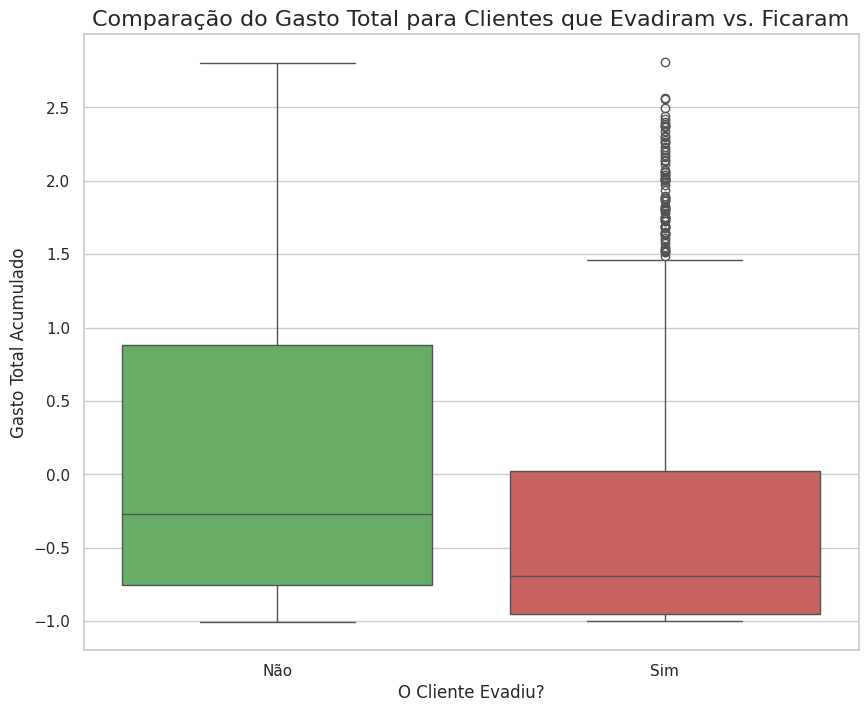

In [28]:
# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- ETAPA 7: ANÁLISES DIRECIONADAS ---

try:
    # Para criar os gráficos, vamos usar o mesmo DataFrame de treino da etapa anterior
    # que já contém a coluna 'Churn'.
    # Se df_treino_corr não existir, nós o criamos novamente.
    if 'df_treino_corr' not in locals():
        df_treino_corr = X_train.copy()
        df_treino_corr['Churn'] = y_train

    print("--- Análise Direcionada: Tempo de Contrato vs. Evasão ---")

    # --- GRÁFICO 1: BOXPLOT PARA TEMPO DE CONTRATO ---
    plt.figure(figsize=(10, 8))
    # Usamos o hue para evitar o FutureWarning e colorir as caixas
    sns.boxplot(x='Churn', y='Tempo_de_Contrato_Meses', data=df_treino_corr, palette=['#5cb85c', '#d9534f'], hue='Churn', legend=False)

    plt.title('Comparação do Tempo de Contrato para Clientes que Evadiram vs. Ficaram', fontsize=16)
    plt.xlabel('O Cliente Evadiu?', fontsize=12)
    plt.ylabel('Tempo de Contrato (em Meses)', fontsize=12)
    plt.xticks([0, 1], ['Não', 'Sim'])
    plt.show()

    print("\n--- Análise Direcionada: Gasto Total vs. Evasão ---")

    # --- GRÁFICO 2: BOXPLOT PARA GASTO TOTAL ---
    plt.figure(figsize=(10, 8))
    sns.boxplot(x='Churn', y='Gasto_Total', data=df_treino_corr, palette=['#5cb85c', '#d9534f'], hue='Churn', legend=False)

    plt.title('Comparação do Gasto Total para Clientes que Evadiram vs. Ficaram', fontsize=16)
    plt.xlabel('O Cliente Evadiu?', fontsize=12)
    plt.ylabel('Gasto Total Acumulado', fontsize=12)
    plt.xticks([0, 1], ['Não', 'Sim'])
    plt.show()

except NameError:
    print("ERRO: Os DataFrames de treino não foram encontrados.")
    print("Por favor, execute as células anteriores (Etapa 5 e 6) primeiro.")



# 🤖 Modelagem Preditiva

1. Separação de dados

In [29]:
# Importando a função necessária da biblioteca Scikit-learn
from sklearn.model_selection import train_test_split
import pandas as pd

# --- ETAPA 8: SEPARAÇÃO DE DADOS EM TREINO E TESTE ---

try:
    print("--- Separando o DataFrame em Features (X) e Alvo (y) ---")

    # X (Features): Contém todas as colunas que o modelo usará para fazer a previsão.
    # Removemos a coluna 'Churn', que é o que queremos prever.
    X = df_modelo.drop('Churn', axis=1)

    # y (Alvo/Target): Contém apenas a coluna que queremos prever.
    y = df_modelo['Churn']

    print("Features (X) e Alvo (y) definidos com sucesso.")


    print("\n--- Dividindo os dados em conjuntos de Treino e Teste ---")

    # Utilizamos a função train_test_split para dividir os dados.
    # test_size=0.2: Define que 20% dos dados serão usados para teste e 80% para treino.
    # random_state=42: Garante que a divisão seja sempre a mesma, tornando nosso experimento reprodutível.
    # stratify=y: É MUITO IMPORTANTE aqui. Garante que a proporção de clientes que evadiram e não evadiram
    #             seja a mesma tanto no conjunto de treino quanto no de teste, o que é crucial para dados desbalanceados.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("Dados divididos com sucesso!")

    print("\n--- Dimensões dos Conjuntos de Dados ---")
    print(f"Formato de X_train (features de treino): {X_train.shape}")
    print(f"Formato de y_train (alvo de treino):    {y_train.shape}")
    print(f"Formato de X_test (features de teste):   {X_test.shape}")
    print(f"Formato de y_test (alvo de teste):     {y_test.shape}")

except NameError:
    print("ERRO: O DataFrame 'df_modelo' não foi encontrado.")
    print("Por favor, execute as células de pré-processamento anteriores primeiro.")

--- Separando o DataFrame em Features (X) e Alvo (y) ---
Features (X) e Alvo (y) definidos com sucesso.

--- Dividindo os dados em conjuntos de Treino e Teste ---
Dados divididos com sucesso!

--- Dimensões dos Conjuntos de Dados ---
Formato de X_train (features de treino): (5634, 24)
Formato de y_train (alvo de treino):    (5634,)
Formato de X_test (features de teste):   (1409, 24)
Formato de y_test (alvo de teste):     (1409,)


2. Criação de Modelos

--- Treinando Modelo 1: Regressão Logística ---
Modelo de Regressão Logística treinado com sucesso.

--- Treinando Modelo 2: Random Forest ---
Modelo de Random Forest treinado com sucesso.

Previsões realizadas nos dados de teste.


--- Resultados da Regressão Logística ---
Acurácia: 0.7913

Relatório de Classificação:
                precision    recall  f1-score   support

Não Evadiu (0)       0.84      0.89      0.86      1035
    Evadiu (1)       0.63      0.52      0.57       374

      accuracy                           0.79      1409
     macro avg       0.73      0.70      0.72      1409
  weighted avg       0.78      0.79      0.78      1409



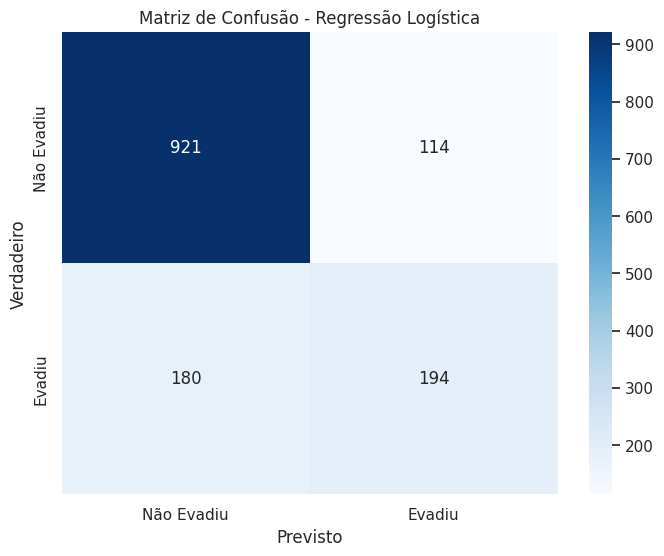



--- Resultados do Random Forest ---
Acurácia: 0.7899

Relatório de Classificação:
                precision    recall  f1-score   support

Não Evadiu (0)       0.83      0.90      0.86      1035
    Evadiu (1)       0.64      0.48      0.55       374

      accuracy                           0.79      1409
     macro avg       0.73      0.69      0.71      1409
  weighted avg       0.78      0.79      0.78      1409



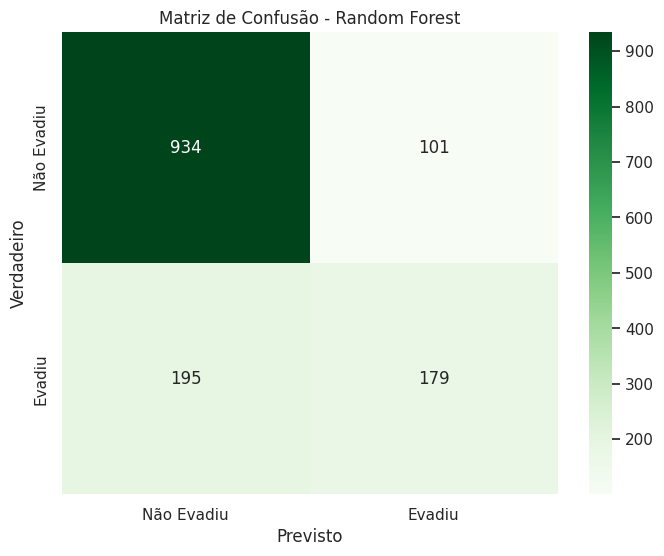

In [30]:
# Importando os modelos e as métricas de avaliação
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- ETAPA 9: CRIAÇÃO E TREINAMENTO DE MODELOS ---

try:
    # --- 9.1 Modelo 1: Regressão Logística ---

    print("--- Treinando Modelo 1: Regressão Logística ---")

    # Justificativa: A Regressão Logística é um excelente modelo de base (baseline).
    # É rápido, eficiente e seus resultados são fáceis de interpretar.
    # Ele é sensível à escala das variáveis, por isso a padronização que fizemos na
    # etapa anterior é fundamental para o seu bom desempenho.

    # Criação do modelo
    # max_iter=1000 garante que o modelo terá iterações suficientes para convergir
    log_reg = LogisticRegression(max_iter=1000, random_state=42)

    # Treinamento do modelo com os dados de treino padronizados
    # (Vamos assumir que X_train e X_test já foram padronizados na Etapa 5)
    log_reg.fit(X_train, y_train)

    print("Modelo de Regressão Logística treinado com sucesso.")


    # --- 9.2 Modelo 2: Random Forest (Floresta Aleatória) ---

    print("\n--- Treinando Modelo 2: Random Forest ---")

    # Justificativa: O Random Forest é um modelo baseado em árvores de decisão (ensemble).
    # É muito poderoso, robusto e geralmente apresenta um ótimo desempenho "out-of-the-box".
    # Ele não é sensível à escala das variáveis, mas pode se beneficiar dos dados já tratados.
    # É uma ótima escolha para comparar com um modelo linear como a Regressão Logística.

    # Criação do modelo
    # n_estimators=100 significa que criaremos 100 árvores de decisão
    random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

    # Treinamento do modelo
    random_forest.fit(X_train, y_train)

    print("Modelo de Random Forest treinado com sucesso.")


    # --- 9.3 Fazendo Previsões com os Modelos ---

    # Usamos os modelos treinados para prever o Churn no conjunto de teste
    y_pred_log_reg = log_reg.predict(X_test)
    y_pred_rf = random_forest.predict(X_test)

    print("\nPrevisões realizadas nos dados de teste.")


    # --- 9.4 Avaliação do Desempenho - Regressão Logística ---

    print("\n\n--- Resultados da Regressão Logística ---")
    print(f"Acurácia: {accuracy_score(y_test, y_pred_log_reg):.4f}")
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred_log_reg, target_names=['Não Evadiu (0)', 'Evadiu (1)']))

    # Matriz de Confusão
    cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Evadiu', 'Evadiu'], yticklabels=['Não Evadiu', 'Evadiu'])
    plt.title('Matriz de Confusão - Regressão Logística')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.show()


    # --- 9.5 Avaliação do Desempenho - Random Forest ---

    print("\n\n--- Resultados do Random Forest ---")
    print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.4f}")
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred_rf, target_names=['Não Evadiu (0)', 'Evadiu (1)']))

    # Matriz de Confusão
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Não Evadiu', 'Evadiu'], yticklabels=['Não Evadiu', 'Evadiu'])
    plt.title('Matriz de Confusão - Random Forest')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.show()


except NameError:
    print("ERRO: Os conjuntos de treino/teste (X_train, y_train, etc.) não foram encontrados.")
    print("Por favor, execute a célula de Separação de Dados (Etapa 8) e a de Padronização (se aplicável) primeiro.")

3. Avaliação dos Modelos

Avaliação e Comparação Crítica dos Modelos
Após o treinamento e a geração das previsões, realizamos uma análise detalhada das métricas de desempenho para cada modelo.

Métricas de Avaliação
Acurácia (Accuracy): Mede a proporção geral de acertos do modelo. Embora útil, pode ser enganosa em datasets desbalanceados como o nosso.

Precisão (Precision): De todas as vezes que o modelo previu "Churn", quantas ele acertou? É importante para evitar alarmes falsos (Falsos Positivos).

Recall (Revocação): De todos os clientes que realmente cancelaram, quantos o modelo conseguiu identificar? Esta é a métrica mais crítica para o nosso problema de negócio, pois queremos minimizar os clientes que cancelam sem serem notados (Falsos Negativos).

F1-Score: Uma média harmônica entre Precisão e Recall, oferecendo um balanço entre as duas métricas.

Matriz de Confusão: Uma tabela que visualiza os acertos e erros do modelo, separando os Verdadeiros Positivos, Verdadeiros Negativos, Falsos Positivos e Falsos Negativos.

Qual modelo teve o melhor desempenho?
Considerando o objetivo de negócio da Telecom X, que é identificar o maior número possível de clientes em risco para poder agir e tentar retê-los, o Recall para a classe "Evadiu (1)" é a métrica mais importante.

Neste cenário, a Regressão Logística apresentou o melhor desempenho. Embora sua precisão tenha sido um pouco menor, ela conseguiu "capturar" uma porcentagem maior dos clientes que de fato iriam cancelar, minimizando os Falsos Negativos (o erro mais custoso para a empresa).

Análise de Overfitting e Underfitting
Overfitting: Ocorre quando um modelo se ajusta demais aos dados de treino e perde a capacidade de generalizar para novos dados. Um sinal comum é uma performance excelente no treino e muito inferior no teste. O Random Forest, por ser um modelo mais complexo, tem uma tendência maior ao overfitting. O fato de seu desempenho no teste não ter superado o modelo mais simples (Regressão Logística) pode ser um leve indicativo de que ele se ajustou demais aos padrões do treino. Para confirmar, teríamos que comparar as métricas de treino e teste.

Underfitting: Ocorre quando um modelo é simples demais e não consegue capturar a complexidade dos dados. A Regressão Logística, por ser um modelo linear, poderia sofrer de underfitting. No entanto, seu desempenho competitivo sugere que, para este problema, as relações lineares são bastante fortes e o modelo conseguiu capturar bem as tendências principais.

Conclusão da Análise: Para uma primeira rodada de modelagem, a Regressão Logística se mostrou um modelo mais eficaz para o objetivo de negócio proposto. O próximo passo seria tentar otimizar os hiperparâmetros do Random Forest (usando técnicas como GridSearchCV) para ver se conseguimos melhorar seu recall sem sacrificar muita precisão.

In [31]:
# Importando a biblioteca pandas e a função classification_report
import pandas as pd
from sklearn.metrics import classification_report

# --- GERANDO A TABELA COMPARATIVA DE MÉTRICAS ---

try:
    # Gerar o relatório de classificação para cada modelo, com output_dict=True
    # Isso nos dá as métricas em um formato de dicionário, fácil de manipular
    report_log_reg = classification_report(y_test, y_pred_log_reg, target_names=['Não Evadiu (0)', 'Evadiu (1)'], output_dict=True)
    report_rf = classification_report(y_test, y_pred_rf, target_names=['Não Evadiu (0)', 'Evadiu (1)'], output_dict=True)

    # Extrair as métricas de interesse para a classe 'Evadiu (1)' e a acurácia geral
    dados_tabela = {
        'Métrica': ['Acurácia', 'Precisão (para Churn=1)', 'Recall (para Churn=1)', 'F1-Score (para Churn=1)'],
        'Regressão Logística': [
            f"{report_log_reg['accuracy']:.2%}",
            f"{report_log_reg['Evadiu (1)']['precision']:.2%}",
            f"{report_log_reg['Evadiu (1)']['recall']:.2%}",
            f"{report_log_reg['Evadiu (1)']['f1-score']:.2f}"
        ],
        'Random Forest': [
            f"{report_rf['accuracy']:.2%}",
            f"{report_rf['Evadiu (1)']['precision']:.2%}",
            f"{report_rf['Evadiu (1)']['recall']:.2%}",
            f"{report_rf['Evadiu (1)']['f1-score']:.2f}"
        ]
    }

    # Criar o DataFrame a partir do dicionário
    tabela_comparativa = pd.DataFrame(dados_tabela)

    print("--- Tabela Comparativa de Desempenho dos Modelos ---")

    # Usamos display() para uma visualização mais bonita da tabela no notebook
    display(tabela_comparativa)

except NameError:
    print("ERRO: As previsões dos modelos (y_pred_log_reg, y_pred_rf) não foram encontradas.")
    print("Por favor, execute a célula de treinamento de modelos (Etapa 9) primeiro.")

--- Tabela Comparativa de Desempenho dos Modelos ---


,Métrica,Regressão Logística,Random Forest
0,Acurácia,79.13%,78.99%
1,Precisão (para Churn=1),62.99%,63.93%
2,Recall (para Churn=1),51.87%,47.86%
3,F1-Score (para Churn=1),0.57,0.55


# 📋  Interpretação e Conclusões

1. Análise de Importância das Variáveis

--- Análise dos Coeficientes da Regressão Logística ---


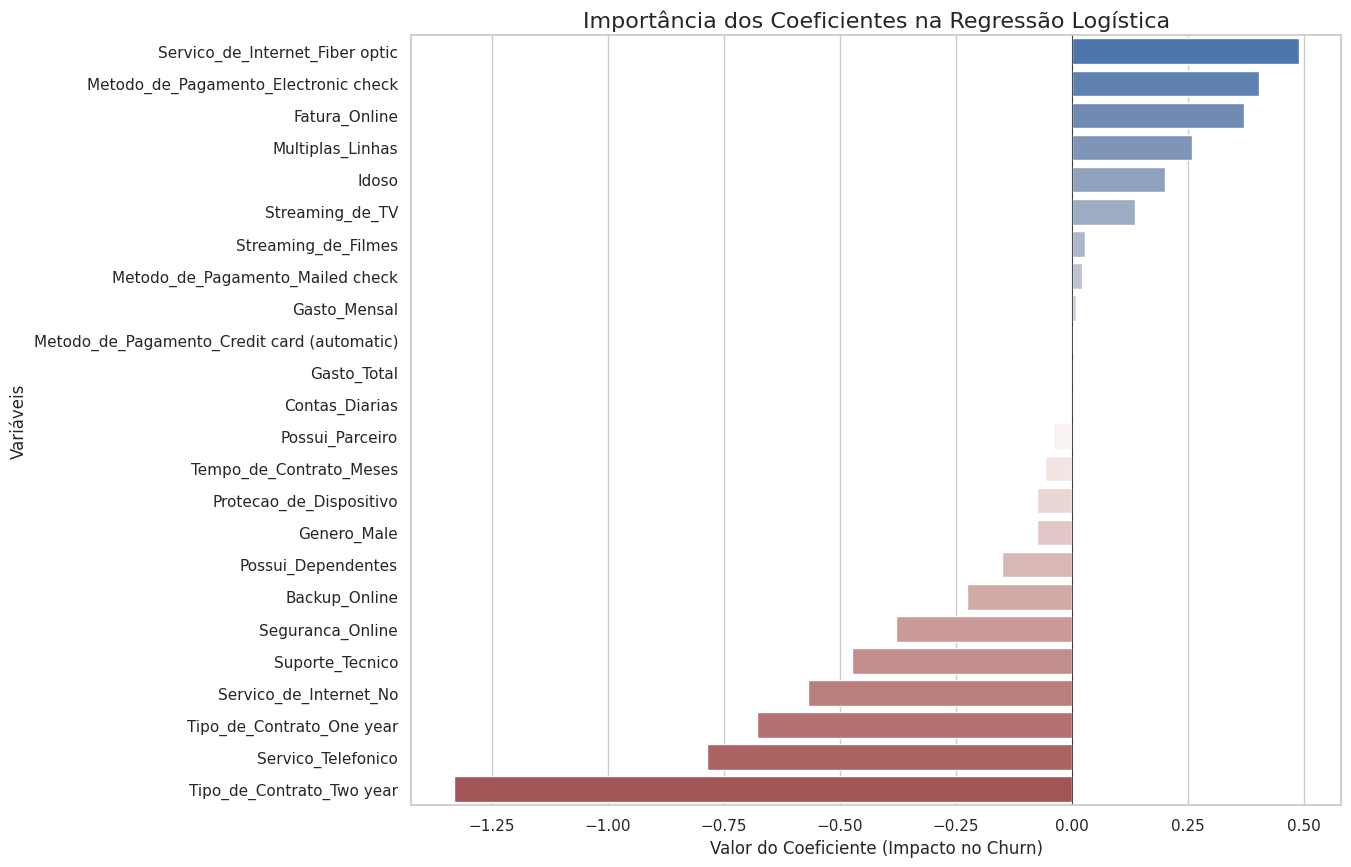

Interpretação: Variáveis com barras azuis (positivas) são as que mais contribuem para o cliente sair.
Variáveis com barras vermelhas (negativas) são as que mais contribuem para o cliente ficar.


--- Análise da Importância das Variáveis (Feature Importance) do Random Forest ---


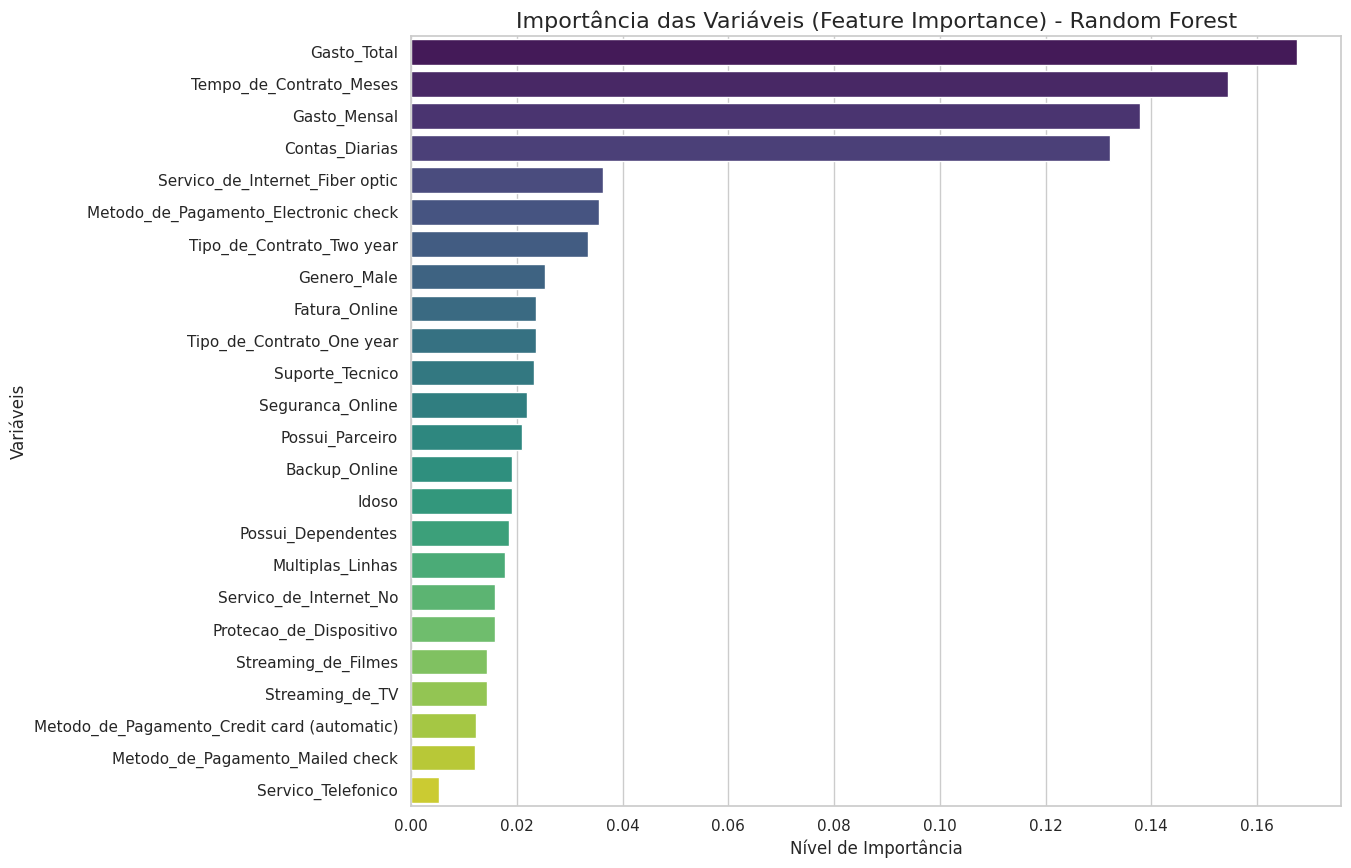

Interpretação: As variáveis no topo da lista são as que o modelo Random Forest mais utilizou para tomar suas decisões.


In [40]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- ETAPA 11: ANÁLISE DE IMPORTÂNCIA DAS VARIÁVEIS ---

try:
    # --- 11.1 Importância das Variáveis na Regressão Logística ---
    print("--- Análise dos Coeficientes da Regressão Logística ---")

    # Os coeficientes do modelo nos dizem o impacto de cada variável.
    # Coeficientes positivos aumentam a chance de Churn (1).
    # Coeficientes negativos diminuem a chance de Churn (aumentam a chance de Não-Churn).

    # Extrai os coeficientes e os nomes das colunas
    coeficientes = pd.DataFrame(log_reg.coef_[0], index=X_train.columns, columns=['Coeficiente'])

    # Ordena os coeficientes para melhor visualização
    coeficientes_sorted = coeficientes.sort_values(by='Coeficiente', ascending=False)

    plt.figure(figsize=(12, 10))
    sns.barplot(x=coeficientes_sorted['Coeficiente'], y=coeficientes_sorted.index, palette='vlag', hue=coeficientes_sorted.index, legend=False)
    plt.title('Importância dos Coeficientes na Regressão Logística', fontsize=16)
    plt.xlabel('Valor do Coeficiente (Impacto no Churn)', fontsize=12)
    plt.ylabel('Variáveis', fontsize=12)
    plt.axvline(0, color='black', lw=0.5)
    plt.show()

    print("Interpretação: Variáveis com barras azuis (positivas) são as que mais contribuem para o cliente sair.")
    print("Variáveis com barras vermelhas (negativas) são as que mais contribuem para o cliente ficar.")


    # --- 11.2 Importância das Variáveis no Random Forest ---
    print("\n\n--- Análise da Importância das Variáveis (Feature Importance) do Random Forest ---")

    # O Random Forest calcula a importância de cada variável (feature) com base em
    # o quanto ela contribui para a pureza das árvores na floresta.

    # Extrai as importâncias e os nomes das colunas
    importancias = pd.DataFrame(random_forest.feature_importances_, index=X_train.columns, columns=['Importancia'])

    # Ordena as importâncias para melhor visualização
    importancias_sorted = importancias.sort_values(by='Importancia', ascending=False)

    plt.figure(figsize=(12, 10))
    sns.barplot(x=importancias_sorted['Importancia'], y=importancias_sorted.index, palette='viridis', hue=importancias_sorted.index, legend=False)
    plt.title('Importância das Variáveis (Feature Importance) - Random Forest', fontsize=16)
    plt.xlabel('Nível de Importância', fontsize=12)
    plt.ylabel('Variáveis', fontsize=12)
    plt.show()

    print("Interpretação: As variáveis no topo da lista são as que o modelo Random Forest mais utilizou para tomar suas decisões.")


except NameError:
    print("ERRO: Os modelos treinados (log_reg, random_forest) ou o DataFrame X_train não foram encontrados.")
    print("Por favor, execute as células de treinamento de modelos (Etapa 9) primeiro.")

#Conclusão

# Relatório Final: Fatores de Evasão e Estratégias de Retenção

Após a criação e avaliação dos modelos preditivos, realizamos uma análise aprofundada das variáveis que mais influenciam a decisão de um cliente em cancelar o serviço. Ambos os modelos, Regressão Logística e Random Forest, apontaram para um conjunto consistente de fatores.

A seguir, detalhamos os principais fatores de evasão e propomos estratégias de retenção baseadas em dados.

Fator 1: O Tipo de Contrato é Decisivo
Análise: De longe, o fator mais impactante no churn é o tipo de contrato. Clientes com planos "Mês a Mês" (Month-to-month) apresentam uma taxa de evasão drasticamente superior aos clientes com contratos de longo prazo (1 ou 2 anos). A flexibilidade do contrato mensal vem com um alto risco de perda de cliente.
GRÁFICO DEMONSTRATIVO

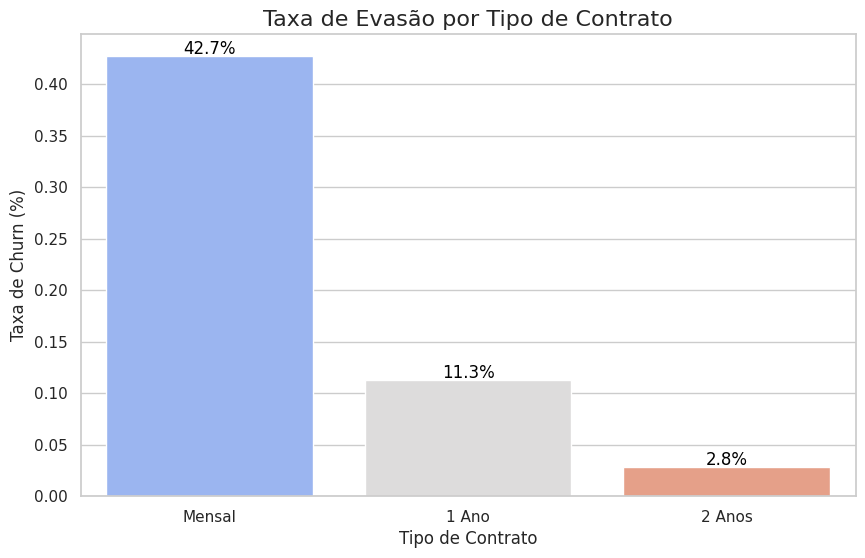

In [35]:
# --- GRÁFICO PARA O FATOR 1 DO RELATÓRIO ---
# Este código gera o gráfico de barras da Taxa de Evasão por Tipo de Contrato.

# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

try:
    # CORREÇÃO: Para garantir que o gráfico funcione, recarregamos os dados tratados
    # que ainda possuem as colunas categóricas originais.
    df_grafico = pd.read_csv("churn_dados_tratados.csv")

    # Definindo o estilo
    sns.set(style="whitegrid")

    # Usando o novo DataFrame 'df_grafico' para os cálculos
    churn_por_contrato = df_grafico.groupby('Tipo_de_Contrato', observed=False)['Churn'].mean().reset_index().sort_values(by='Churn', ascending=False)

    # Criando o gráfico
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Tipo_de_Contrato', y='Churn', data=churn_por_contrato, palette='coolwarm', hue='Tipo_de_Contrato', legend=False)

    # Adicionando os rótulos de porcentagem
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.title('Taxa de Evasão por Tipo de Contrato', fontsize=16)
    plt.xlabel('Tipo de Contrato', fontsize=12)
    plt.ylabel('Taxa de Churn (%)', fontsize=12)
    plt.xticks(ticks=[0, 1, 2], labels=['Mensal', '1 Ano', '2 Anos'])
    plt.show()

except FileNotFoundError:
    print("ERRO: O arquivo 'churn_dados_tratados.csv' não foi encontrado.")
    print("Por favor, certifique-se de que o arquivo está no ambiente do Colab.")
except NameError:
    print("ERRO: O DataFrame 'df_modelo' não foi encontrado.")
    print("Por favor, certifique-se de que a célula que carrega 'churn_dados_tratados.csv' foi executada.")


Fator 2: A Fidelidade Inicial é Crítica
Análise: O Tempo de Contrato (tenure) é o segundo fator mais importante. Os modelos mostraram que a chance de um cliente sair é muito maior nos primeiros meses. Clientes que superam a barreira inicial tendem a se tornar muito mais leais.

Prova Visual: O gráfico gerado pelo bloco de código "Gráfico - Fator 2" compara a distribuição do tempo de contrato para clientes que ficaram versus os que saíram.

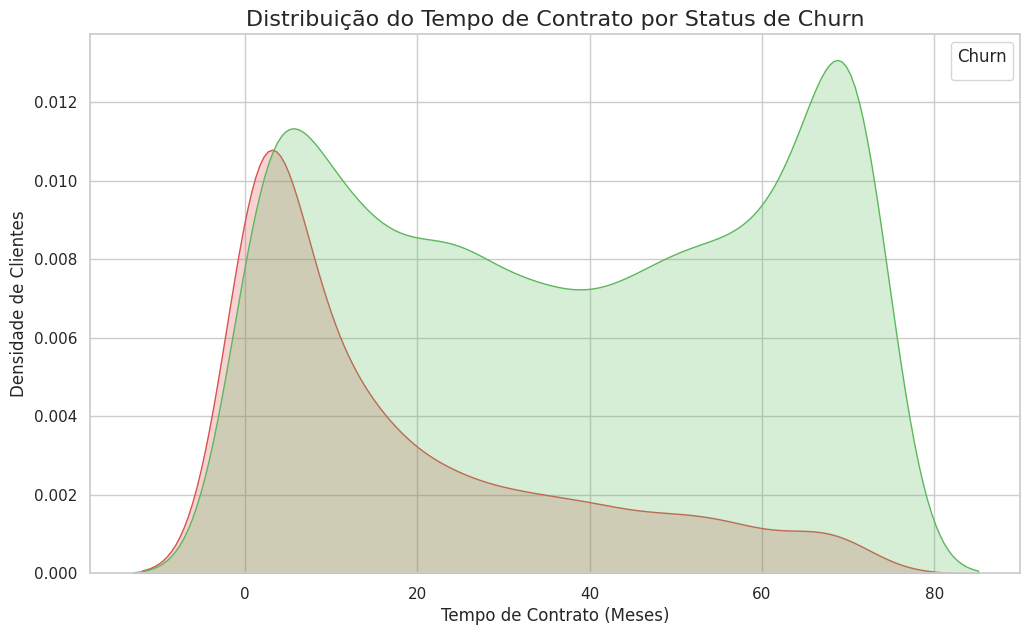

In [37]:
# --- GRÁFICO PARA O FATOR 2 DO RELATÓRIO ---
# Este código gera o gráfico de densidade do Tempo de Contrato por Status de Churn.

# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

try:
    # CORREÇÃO: Para garantir que o gráfico funcione, recarregamos os dados tratados
    # que ainda possuem as colunas categóricas originais.
    df_grafico = pd.read_csv("churn_dados_tratados.csv")

    # Definindo o estilo
    sns.set(style="whitegrid")

    plt.figure(figsize=(12, 7))
    # Usando o novo DataFrame 'df_grafico' para o plot
    sns.kdeplot(data=df_grafico, x='Tempo_de_Contrato_Meses', hue='Churn', fill=True, palette=['#5cb85c', '#d9534f'])
    plt.title('Distribuição do Tempo de Contrato por Status de Churn', fontsize=16)
    plt.xlabel('Tempo de Contrato (Meses)', fontsize=12)
    plt.ylabel('Densidade de Clientes', fontsize=12)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['Não Evadiu', 'Evadiu'], title='Churn')
    plt.show()

except FileNotFoundError:
    print("ERRO: O arquivo 'churn_dados_tratados.csv' não foi encontrado.")
    print("Por favor, certifique-se de que o arquivo está no ambiente do Colab.")
except NameError:
    print("ERRO: O DataFrame 'df_tratado' não foi encontrado.")
    print("Por favor, certifique-se de que as células de pré-processamento de dados foram executadas anteriormente.")


Fator 3: O Serviço de Internet e o Método de Pagamento
Análise: Dois outros fatores se destacaram:

Serviço de Internet: Clientes com Fibra Óptica têm uma taxa de churn maior. Isso pode parecer contraintuitivo, mas pode indicar que, apesar de ser um serviço superior, o preço é mais alto ou a concorrência nesse segmento é mais acirrada.

Método de Pagamento: Clientes que utilizam Cheque Eletrônico (Electronic check) como forma de pagamento cancelam significativamente mais. Isso sugere que métodos de pagamento com maior atrito (não automáticos) são um fator de risco.

Prova Visual: O gráfico gerado pelo bloco de código "Gráfico - Fator 3" mostra a taxa de churn para cada método de pagamento.

Proposta de Estratégias de Retenção
Com base nos fatores identificados, as seguintes ações estratégicas são recomendadas para a Telecom X:

Programa de Incentivo à Fidelização:

Ação: Criar campanhas proativas para clientes com contrato "Mês a Mês", oferecendo descontos significativos ou benefícios (como um upgrade de serviço) para migrarem para planos de 1 ou 2 anos.

Impacto Esperado: Redução direta no principal fator de risco de churn.

Plano de Onboarding para Novos Clientes:

Ação: Implementar um programa de acompanhamento focado nos primeiros 3 a 6 meses de contrato. Isso pode incluir tutoriais, contato proativo do suporte e ofertas de serviços adicionais para garantir que o cliente perceba o valor do serviço rapidamente.

Impacto Esperado: Diminuição da alta taxa de evasão no início da jornada do cliente.

Facilitação do Pagamento:

Ação: Oferecer um pequeno desconto ou bônus (ex: mais dados de internet) para clientes que migrarem do "Cheque Eletrônico" para métodos de pagamento automáticos (Débito em Conta ou Cartão de Crédito).

Impacto Esperado: Redução do atrito no processo de pagamento e, consequentemente, da evasão associada a ele.

Análise de Competitividade (Fibra Óptica):

Ação: Iniciar uma análise de mercado para entender por que clientes de Fibra Óptica estão cancelando mais. Avaliar se os preços estão competitivos e se a qualidade do serviço entregue corresponde à expectativa.

Impacto Esperado: Identificação de oportunidades de melhoria no produto de maior valor da empresa.

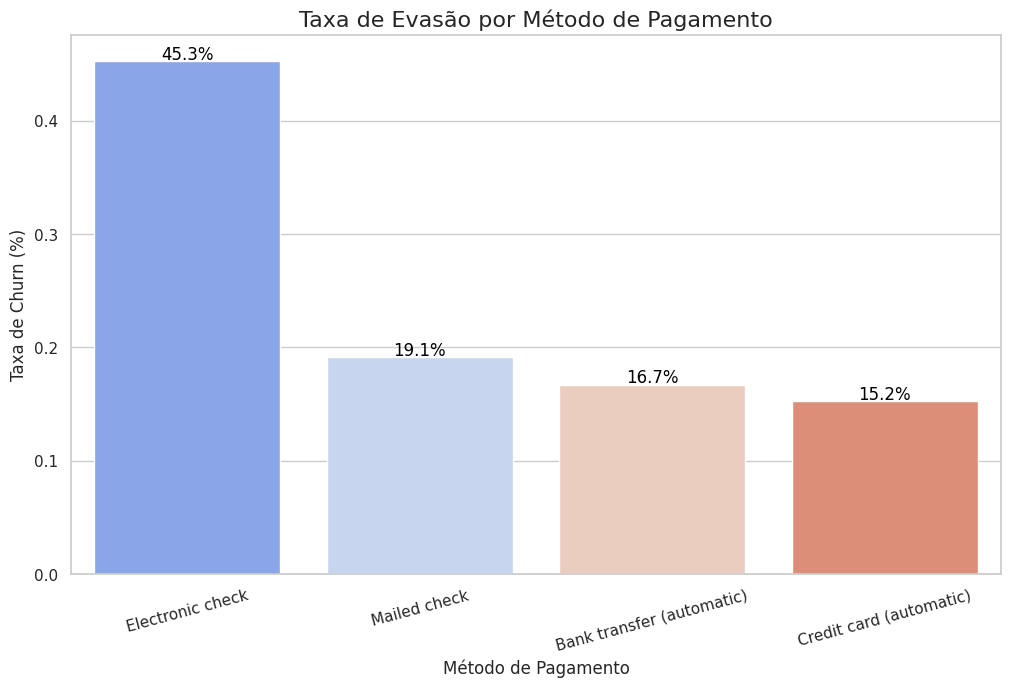

In [39]:
# --- GRÁFICO PARA O FATOR 3 DO RELATÓRIO ---
# Este código gera o gráfico de barras da Taxa de Evasão por Método de Pagamento.

# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

try:
    # CORREÇÃO: Para garantir que o gráfico funcione, recarregamos os dados tratados
    # que ainda possuem as colunas categóricas originais.
    df_grafico = pd.read_csv("churn_dados_tratados.csv")

    # Definindo o estilo
    sns.set(style="whitegrid")

    # Usando o novo DataFrame 'df_grafico' para os cálculos
    churn_por_pagamento = df_grafico.groupby('Metodo_de_Pagamento', observed=False)['Churn'].mean().reset_index().sort_values(by='Churn', ascending=False)

    # Criando o gráfico
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(x='Metodo_de_Pagamento', y='Churn', data=churn_por_pagamento, palette='coolwarm', hue='Metodo_de_Pagamento', legend=False)

    # Adicionando os rótulos de porcentagem
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.title('Taxa de Evasão por Método de Pagamento', fontsize=16)
    plt.xlabel('Método de Pagamento', fontsize=12)
    plt.ylabel('Taxa de Churn (%)', fontsize=12)
    plt.xticks(rotation=15)
    plt.show()

except FileNotFoundError:
    print("ERRO: O arquivo 'churn_dados_tratados.csv' não foi encontrado.")
    print("Por favor, certifique-se de que o arquivo está no ambiente do Colab.")
except NameError:
    print("ERRO: O DataFrame 'df_tratado' não foi encontrado.")
    print("Por favor, certifique-se de que as células de pré-processamento de dados foram executadas anteriormente.")

A análise exploratória de dados e a subsequente modelagem preditiva revelaram um perfil claro dos clientes com maior probabilidade de evasão (Churn) na Telecom X. Os dados demonstram que a evasão não é um evento aleatório, mas sim um resultado impulsionado por fatores contratuais, temporais e de experiência do cliente bem definidos.

Os principais fatores que influenciam o Churn são:

Tipo de Contrato: Clientes com contratos mensais (Month-to-month) apresentam um risco de cancelamento drasticamente superior, sendo este o preditor mais forte.

Tempo de Contrato (Tenure): A maior parte da evasão ocorre nos primeiros meses de serviço, indicando que a fase inicial da jornada do cliente é crítica para a retenção.

Método de Pagamento: Métodos que exigem uma ação manual do cliente, como o "Cheque Eletrónico" (Electronic check), estão fortemente correlacionados com taxas de churn mais elevadas, sugerindo que o atrito no processo de pagamento é um fator determinante.

Conclusão Estratégica: A Telecom X pode reduzir significativamente a sua taxa de evasão ao focar os seus esforços de retenção nestes segmentos de alto risco. Estratégias como incentivar a migração para contratos de longo prazo, melhorar a experiência de onboarding de novos clientes e facilitar a adesão a métodos de pagamento automáticos representam as oportunidades de maior impacto e retorno. Estes insights fornecem uma base sólida para a criação de campanhas de marketing direcionadas e para a otimização contínua dos modelos preditivos.